In [2]:
import tensorflow as tf
import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.utils import to_categorical
import os
import seaborn as sns

Using TensorFlow backend.


In [211]:
dir=r"D:\dataset\rock_paperCopy\rps_cv_images"

In [212]:
print(len(os.listdir(os.path.join(dir,"paper"))))

2848


In [213]:
datagen=ImageDataGenerator(
horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=90,
    fill_mode="nearest"
)

In [214]:
def data_augment():
    k=0
    c=0 #needed as whenever it forms batch as prefix will be same if we dont use so it overwrites. 
    for cl in os.listdir(r"D:\dataset\rock_paperCopy\rps_cv_images"):
        folderpath=os.path.join(r"D:\dataset\rock_paperCopy\rps_cv_images",cl)
        for img in os.listdir(folderpath):
        #     print(img)

            filepath=os.path.join(folderpath,img)
        #     print(filepath)
            if os.path.isfile(filepath):

                img=cv2.imread(filepath,0)
                img=img.reshape((1,)+img.shape+(1,))
            #     print(img.shape)
            #     break
                c=c+1
                for i in datagen.flow(img,save_prefix=cl+str(c),seed=22,save_to_dir=folderpath):
                    k+=1
                    if k>2:
                        k=0
    #                     print("completed set")
                        break;
        print("Completed one folder")
        c=0

In [3]:
classes={0:"paper",1:"rock",2:"scissors"}

In [216]:
c=0

dataset=[]
for folder in os.listdir(dir):
#     print(folder)
    path1=os.path.join(dir,folder)
    for img in os.listdir(path1):
#         print(img)
        img=load_img(os.path.join(path1,img),target_size=(50,50),color_mode = "grayscale")
        img=img_to_array(img)
        
        img=img/255.0
        dataset.append([img,c])
        
    c=c+1
        
        
    

In [217]:
dataset[0]

[array([[[0.41960785],
         [0.44705883],
         [0.44313726],
         ...,
         [0.43137255],
         [0.42745098],
         [0.40784314]],
 
        [[0.45490196],
         [0.44313726],
         [0.45490196],
         ...,
         [0.42352942],
         [0.41568628],
         [0.41568628]],
 
        [[0.44705883],
         [0.4509804 ],
         [0.45490196],
         ...,
         [0.4392157 ],
         [0.42352942],
         [0.42745098]],
 
        ...,
 
        [[0.45490196],
         [0.45490196],
         [0.4509804 ],
         ...,
         [0.5058824 ],
         [0.50980395],
         [0.5019608 ]],
 
        [[0.4509804 ],
         [0.45490196],
         [0.4627451 ],
         ...,
         [0.5058824 ],
         [0.49019608],
         [0.49803922]],
 
        [[0.45490196],
         [0.4509804 ],
         [0.45490196],
         ...,
         [0.5058824 ],
         [0.49019608],
         [0.4862745 ]]], dtype=float32), 0]

In [218]:
X,Y=zip(*dataset)

In [219]:
len(Y)

8752

In [220]:
rk,pap,sci=0,0,0
for i in Y:
    if(i==0):
        rk=rk+1
    elif(i==1):
        pap+=1
    else:
        sci+=1

In [221]:
print("rock:",rk)
print("Paper: ",pap)
print("Scissor: ",sci)

rock: 2848
Paper:  2904
Scissor:  3000


C:\Users\piyush\Anaconda3\lib\site-packages\seaborn\categorical.py:249: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  grouped_vals = vals.groupby(grouper)


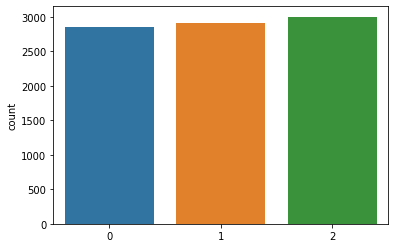

In [225]:
sns.countplot(Y)

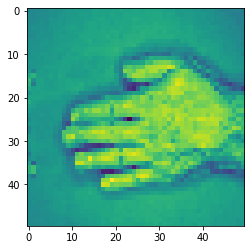

In [226]:
plt.imshow(np.squeeze(X[0]))

In [227]:
Y=to_categorical(Y)
Y.shape

(8752, 3)

In [228]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [229]:
X=np.array(X)
X.shape

(8752, 50, 50, 1)

In [230]:
x_train,x_test_val,y_train,y_test_val=train_test_split(X,Y,test_size=0.4,shuffle=True,random_state=11)
x_test,x_val,y_test,y_val=train_test_split(x_test_val,y_test_val,test_size=0.5,shuffle=True,random_state=11)

In [231]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_val.shape,y_val.shape)

(5251, 50, 50, 1) (5251, 3)
(1750, 50, 50, 1) (1750, 3)
(1751, 50, 50, 1) (1751, 3)


C:\Users\piyush\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


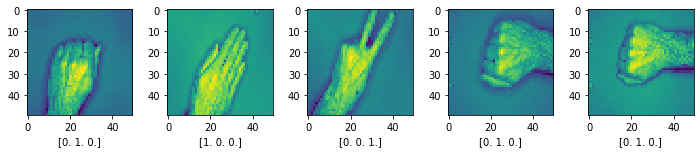

In [232]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(np.squeeze(x_train[i]))
    plt.xlabel(y_train[i])
    plt.tight_layout()
    



In [235]:
def model_training():
    model=Sequential()
    model.add(Conv2D(64,(3,3),input_shape=(50,50,1),activation="relu"))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.3))
    model.add(Conv2D(128,(3,3),activation="relu"))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dense(3,activation="softmax"))
#     model.summary()
    return model
    
model=model_training()    

In [267]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 15488)            

In [237]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["acc"])

In [238]:
x_train.shape

(5251, 50, 50, 1)

In [239]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=5,batch_size=32)

Train on 5251 samples, validate on 1751 samples
Epoch 1/5
5251/5251 [==============================] - 6s 1ms/step - loss: 0.7692 - acc: 0.6483 - val_loss: 0.3678 - val_acc: 0.8789
Epoch 2/5
5251/5251 [==============================] - 5s 989us/step - loss: 0.2521 - acc: 0.9143 - val_loss: 0.1324 - val_acc: 0.9629
Epoch 3/5
5251/5251 [==============================] - 5s 1ms/step - loss: 0.1306 - acc: 0.9575 - val_loss: 0.1067 - val_acc: 0.9669
Epoch 4/5
5251/5251 [==============================] - 5s 979us/step - loss: 0.0896 - acc: 0.9701 - val_loss: 0.0973 - val_acc: 0.9720
Epoch 5/5
5251/5251 [==============================] - 5s 968us/step - loss: 0.0654 - acc: 0.9752 - val_loss: 0.1079 - val_acc: 0.9652


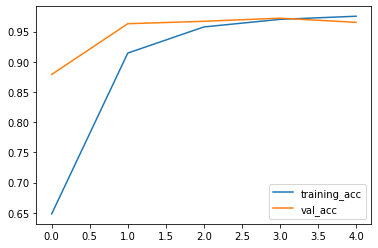

In [243]:
plt.plot(history.epoch,history.history["acc"],label="training_acc")
plt.plot(history.epoch,history.history["val_acc"],label="val_acc")
# plt.legend(["blue","green"])
plt.legend()
plt.show()

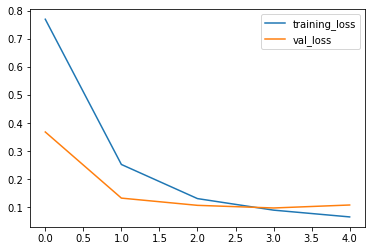

In [244]:
plt.plot(history.epoch,history.history["loss"],label="training_loss")
plt.plot(history.epoch,history.history["val_loss"],label="val_loss")
# plt.legend(["blue","green"])
plt.legend()
plt.show()

In [245]:
test_loss,test_acc=model.evaluate(x_test,y_test,batch_size=128)
print("Test loss:",test_loss)
print("Test acc:",test_acc)

1750/1750 [==============================] - 0s 140us/step
Test loss: 0.10332793297937938
Test acc: 0.9685714244842529


In [270]:
model.save(r"D:\Models\rock_paper_model_pract.h5")

In [4]:
model=keras.models.load_model(r"D:\Models\rock_paper_model_pract.h5")

In [246]:
print(np.argmax(model.predict(x_test[[0]])))
y_test[0]

1


array([0., 1., 0.], dtype=float32)

In [248]:
classes

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [257]:
y_test[3]

array([1., 0., 0.], dtype=float32)

In [253]:
classes[np.argmax(y_test[3])]

'paper'

In [205]:
classes["rock"]

1

In [256]:
model.predict(x_test[[0]])

array([[4.7756298e-04, 9.9773550e-01, 1.7869553e-03]], dtype=float32)

In [260]:
pred=np.argmax(model.predict(x_test[[0]]))
pred=classes[pred]
pred

'rock'

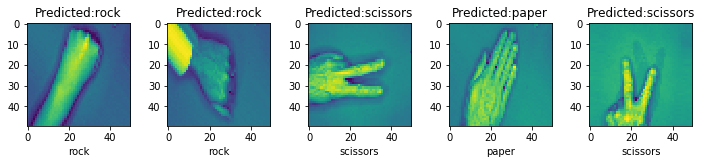

In [264]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(np.squeeze(x_test[i]))
    pred=np.argmax(model.predict(x_test[[i]]))
    pred=classes[pred]
    plt.xlabel(classes[np.argmax(y_test[i])]) #actual value
    plt.title(f"Predicted:{pred}")
    plt.tight_layout()
    

In [22]:
print(preprocess_predict_video("D:CNN practise\scissor.jpg"))

(1, 50, 50, 1)
paper


## Video capture

In [ ]:
def preprocess_predict_video(img):
        # img=cv2.imread(img,0)
    img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img=cv2.resize(img,(50,50))
    img=np.expand_dims(img,0)
    img=np.expand_dims(img,3)
    img=img/255.0
    # img=load_img(img,target_size=(50,50),color_mode = "grayscale")
    # img=img_to_array(img)
    
    # print(img.shape)
    
    pred=np.argmax(model.predict([img]))
    pred=classes[pred]
    return pred
    
    
import cv2
vid=cv2.VideoCapture(0)
while True:
    ret,img=vid.read()
#     print(ret)
    if(ret==True):
        img=cv2.rectangle(img,(100,100),(400,400),0.3)
        
        # cv2.imshow("frame",img);
        newimg=img[100:400,100:400]
        
        prediction=preprocess_predict_video(newimg)
        print(prediction)
        cv2.putText(img,str(prediction),(300,450),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2,cv2.LINE_AA)
        cv2.imshow("camera",img);
     
        if cv2.waitKey(10) & 0xFF == ord('q'):
            
            break
    else:
        print("Can't open")
        break
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [3]:
pwd

'C:\\Users\\piyush\\Jupyter Notebooks'